# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

**PCA**

I think we will see some combination of Fresh, Milk, Grocery, and Frozen since they are all in the larger bucket of "food" items. I would think that you are more likely to buy these things together. 

**ICA** 

For ICA, I think we will see some relationships among the features that indicate what types of stores are really being represented in the data. For example, we may see that one of the dimensions has strong positive values of Detergents/Paper and strong negative values of Fresh. This would indicate an inverse relationship between Detergents/Paper and Fresh, but also perhaps represent a pattern of non-food focused stores and farmer's markets. 

In [142]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
pca_df = pd.DataFrame(pca.components_,columns=data.columns)
print pca_df
print pca.explained_variance_ratio_

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -0.976537 -0.121184 -0.061540 -0.152365          0.007054     -0.068105
1 -0.110614  0.515802  0.764606 -0.018723          0.365351      0.057079
2 -0.178557  0.509887 -0.275781  0.714200         -0.204410      0.283217
3 -0.041876 -0.645640  0.375460  0.646292          0.149380     -0.020396
4  0.015986  0.203236 -0.160292  0.220186          0.207930     -0.917077
5 -0.015763  0.033492  0.410939 -0.013289         -0.871284     -0.265417
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


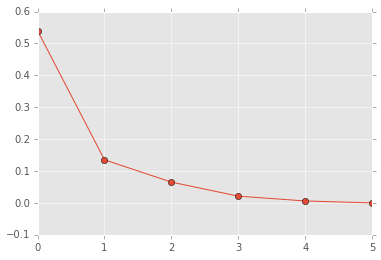

In [163]:
x = np.arange(6)
plt.plot(x, 1 - np.cumsum(pca.explained_variance_ratio_), '-o')

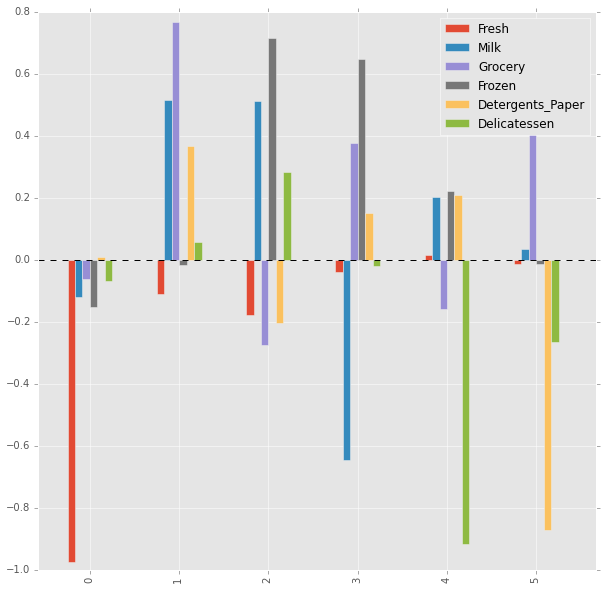

In [162]:
pca_df.plot(kind='bar', figsize=(10, 10))

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The variance drops off rather quickly after the first 2 Principal Componenets. I would use either 2 Principal Components since they account for around 87% of the variance in the data. Adding another Principal Component onlys gets us an additional 7% of the variance in the best case. 

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first dimension seems to mostly represent Fresh, and since it is a negative value, measures mostly a lack of Fresh. The second dimension is wrapped up in measuring Grocery and Milk. 

For each dimension there appears to be one or two features that the Principal Component focuses on given that their scores are higher than other features. You can use this information to approximate what each dimension is representing. This can be helpful when clustering on Principal Components. PCA may help identify overlapping features in a data set based on which features act similarly. As well, Principal Components can be used as inputs to other learning models such as regression and classification as a simpler input for high dimensional data sets. 

###ICA

In [6]:
from sklearn.preprocessing import MinMaxScaler

data_float = data.values.astype(float)

In [139]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing

data_float = data.values.astype(float)
scaler = preprocessing.StandardScaler()
normalized = scaler.fit_transform(data_float)

ica = FastICA(n_components=6, )
ica.fit(normalized)

ica_df = pd.DataFrame(ica.components_,columns=data.columns)

# Print the independent components
print ica_df

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.050256 -0.006604 -0.006993 -0.003233          0.011074     -0.002728
1  0.002106  0.072147 -0.056238 -0.001645          0.017810     -0.016848
2  0.003460 -0.018994 -0.109173  0.007240          0.133406      0.016127
3  0.010910  0.001060 -0.007378 -0.054054          0.002583      0.016763
4  0.002489 -0.013441  0.069080  0.001452         -0.013000     -0.005075
5  0.004895  0.001663  0.005591  0.002531         -0.002430     -0.050967


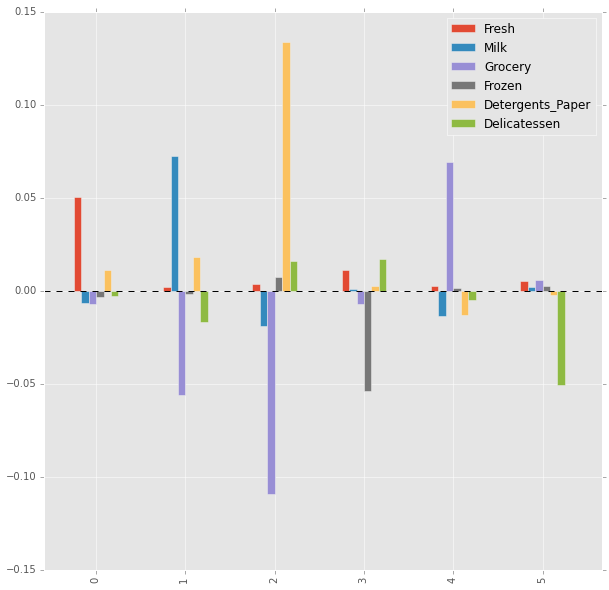

In [140]:
ica_df.plot(kind='bar', figsize=(10, 10))

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

*Vector 0* - Looks like it is mostly driven by having "Fresh" which may signify that it is a Farmer's Market type of store. 

*Vector 1* - Is driven by having Milk and Detergents and not having Groceries and Delicatessen. This may be a smaller, convenient store type of customer. 

*Vecotr 2* - Appears to strongly have Detergents_Paper and also have Delicatessen. As well they are less likely to have Milk and Groceries. This is likely a specialty store that does not focus on food and normal groceries, but instead on less-common goods. 

*Vector 3* - Seems to be less likely to have frozen goods and more likely to have delicatessen or fresh products. Perhaps this is another type of specialtiy shop such as a specialty butcher. 

*Vector 4* - This vector is driven by having the most Grocery, but also less Milk and Detergents_Paper. This might be wholesale food type of store such as Costco or BJs. 

*Vector 5* - The last vector is characterized by having less delicatessen while having everything else. This might be considered a typical grocery store. 

These components could be used for replacements for the original features, and thus be used for both supervised and unsupervised learning algrogithsm alike. Since each vector is statistically independent of each other, I can see where this may be espeically useful for supervised algorithms, especially traditional statistical models. 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: The advantage of Gaussian Mixture Models (GMM) is that it is not as limited in shape as K-Means. Since K-Means relies simply on distance, it can be limited to spherical shaped clusters. As well, K-Means favors larger cluster sizes which can be problematic for clusters that are small by nature. GMM is more flexible in this regard in that it can handle different shapes, and does not favor large clusters. GMM also does not assume equal probabilites for each cluster as K-Means does. 

GMM is also a 'soft-clustering' process which means that a point could belong to more than one cluster. K-Means is much more rigid in that it is impossible for a point to belong to more than one cluster group. This does make K-Means easier to compute, espeically on larger data sets. GMM on the other hand, does not perform well on larger data sets. 

For our data however, we are not dealing with large data, and I believe GMM can be more flexible to our data set. Present day wholesale purchasers of groceries have changed dramatically in the past 20 years. Stores like Wal-Mart, Target, Costco, and others have added a strange diversity of retail options for consumers that previously did not exist. Because there is a lot 'grey area' when it comes to classifying these types of stores, I think GMM is worth using. 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [124]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [125]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [126]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

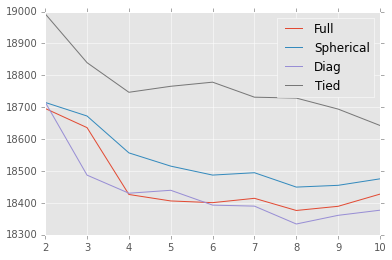

In [127]:
#Find the Optimal K for GMM
k = range(2, 11)
bic_full = [] 
bic_spherical = [] 
bic_diag = [] 
bic_tied = [] 

for i in k: 
    gmm = GMM(n_components=i, covariance_type='full')
    clusters = gmm.fit(reduced_data)
    score_bic = clusters.bic(reduced_data)
    bic_full.append(score_bic)

    gmm = GMM(n_components=i, covariance_type='spherical')
    clusters = gmm.fit(reduced_data)
    score_bic = clusters.bic(reduced_data)
    bic_spherical.append(score_bic)
    
    gmm = GMM(n_components=i, covariance_type='diag')
    clusters = gmm.fit(reduced_data)
    score_bic = clusters.bic(reduced_data)
    bic_diag.append(score_bic)
    
    gmm = GMM(n_components=i, covariance_type='tied')
    clusters = gmm.fit(reduced_data)
    score_bic = clusters.bic(reduced_data)
    bic_tied.append(score_bic)
    
 
plt.plot(k, bic_full, markersize=2, label = 'Full')
plt.plot(k, bic_spherical, markersize=2, label='Spherical')
plt.plot(k, bic_diag, markersize=2, label = 'Diag')
plt.plot(k, bic_tied, markersize=2, label='Tied')
plt.legend()

In [128]:
###It Appears that at K=4 we find the best balance of lower BIC and ease of interpretation 
gmm = GMM(n_components=4, covariance_type='diag')
clusters = gmm.fit(reduced_data)

In [129]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [130]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids = clusters.means_
print centroids

[[  2333.99808554  -6720.89070242]
 [-15325.26498201  -3337.43335973]
 [  7180.76111003   5428.17243393]
 [ -9426.26939834  34474.89301852]]


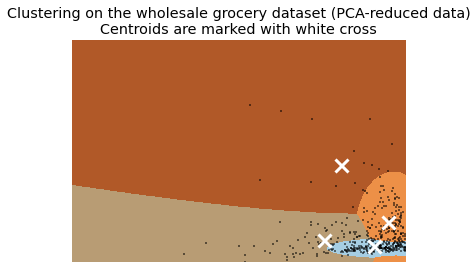

In [161]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: The central objects in each cluster are simply the average object of each cluster. If we were to describe them as customers, we might say that the upper left of the cluster centers are customers that purchase more Milk and Grocery than the other customers. As well, they also purchase Fresh goods, at least more than the clusters to the right. This type of store might be considered a normal grocery store. 

The cluster center in the lower left purchases the most Fresh goods and Frozen goods of any store, however they do not purchase nearly as muhc Milk and Grocery as the others. This group might be considered Farmer's Market types of stores. 

The cluster in the bottom right purchases the least amount of Milk and Grocery, but much less Fresh food than the Farmer's Market type. This might be smaller stores that specialize such as convenience stores. 

Lastly the cluster in the upper right (closest to the small convenience stores) are very similar to the convenience stores, but they purchase more in the way of Grocery and Milk. These might be larger convenience stores or even large retail stores that cover many different types of retail (such as Wal-Mart and Target). 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: I think the ICA was most insightful as it showed which features varied together in a way that forced you to think about potential real interpretations (of the latent variables) - in this case store types. This was distinctly different from PCA which was focused on the variables in the data set. 

**9)** How would you use that technique to help the company design new experiments?

Answer: There are a couple ways in which we could use ICA to assist in future testing. 

The first is to rely on the ICA dimensions and our interprestation to inform deisgns of A/B tests of marketing materials. If we have enough data, instead of simply testing targeted marketing design on a random control and test group, we could draw our control and test groups from only stores that score highly for a given ICA. In our case, we only draw our control and test groups for a marketing campaign targeting Farmer's Markets from *Vector 0*. 

Another approach is to ignore ICA dimensions when conducting an A/B test and instead look to see if those stores that favorably responded to the campaign targeted to a specific kind of store correlated with high scores of a different ICA dimension. 

Hopefully through experimenting we can arrive at a proven (or unproven) understanding of what the ICA dimensions mean for the business practically. 

**10)** How would you use that data to help you predict future customer needs?

Answer: After you have a roboust system of creating and profiling customer segments, you can not only ensure that your current customers are dealt with in a way that makes the most sense for them, but you can also create supervised learning models that assign a customer segment to new customers. By catering services to new customers right away - instead of waiting for months in order to understand what type of customer they are - you can give the business a better shot at retaining those customers. 